<a href="https://colab.research.google.com/github/MichM31/AICrowdBlitz8/blob/main/Michael_Mosimann_F1_Smoke_Elimination_Test_subject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

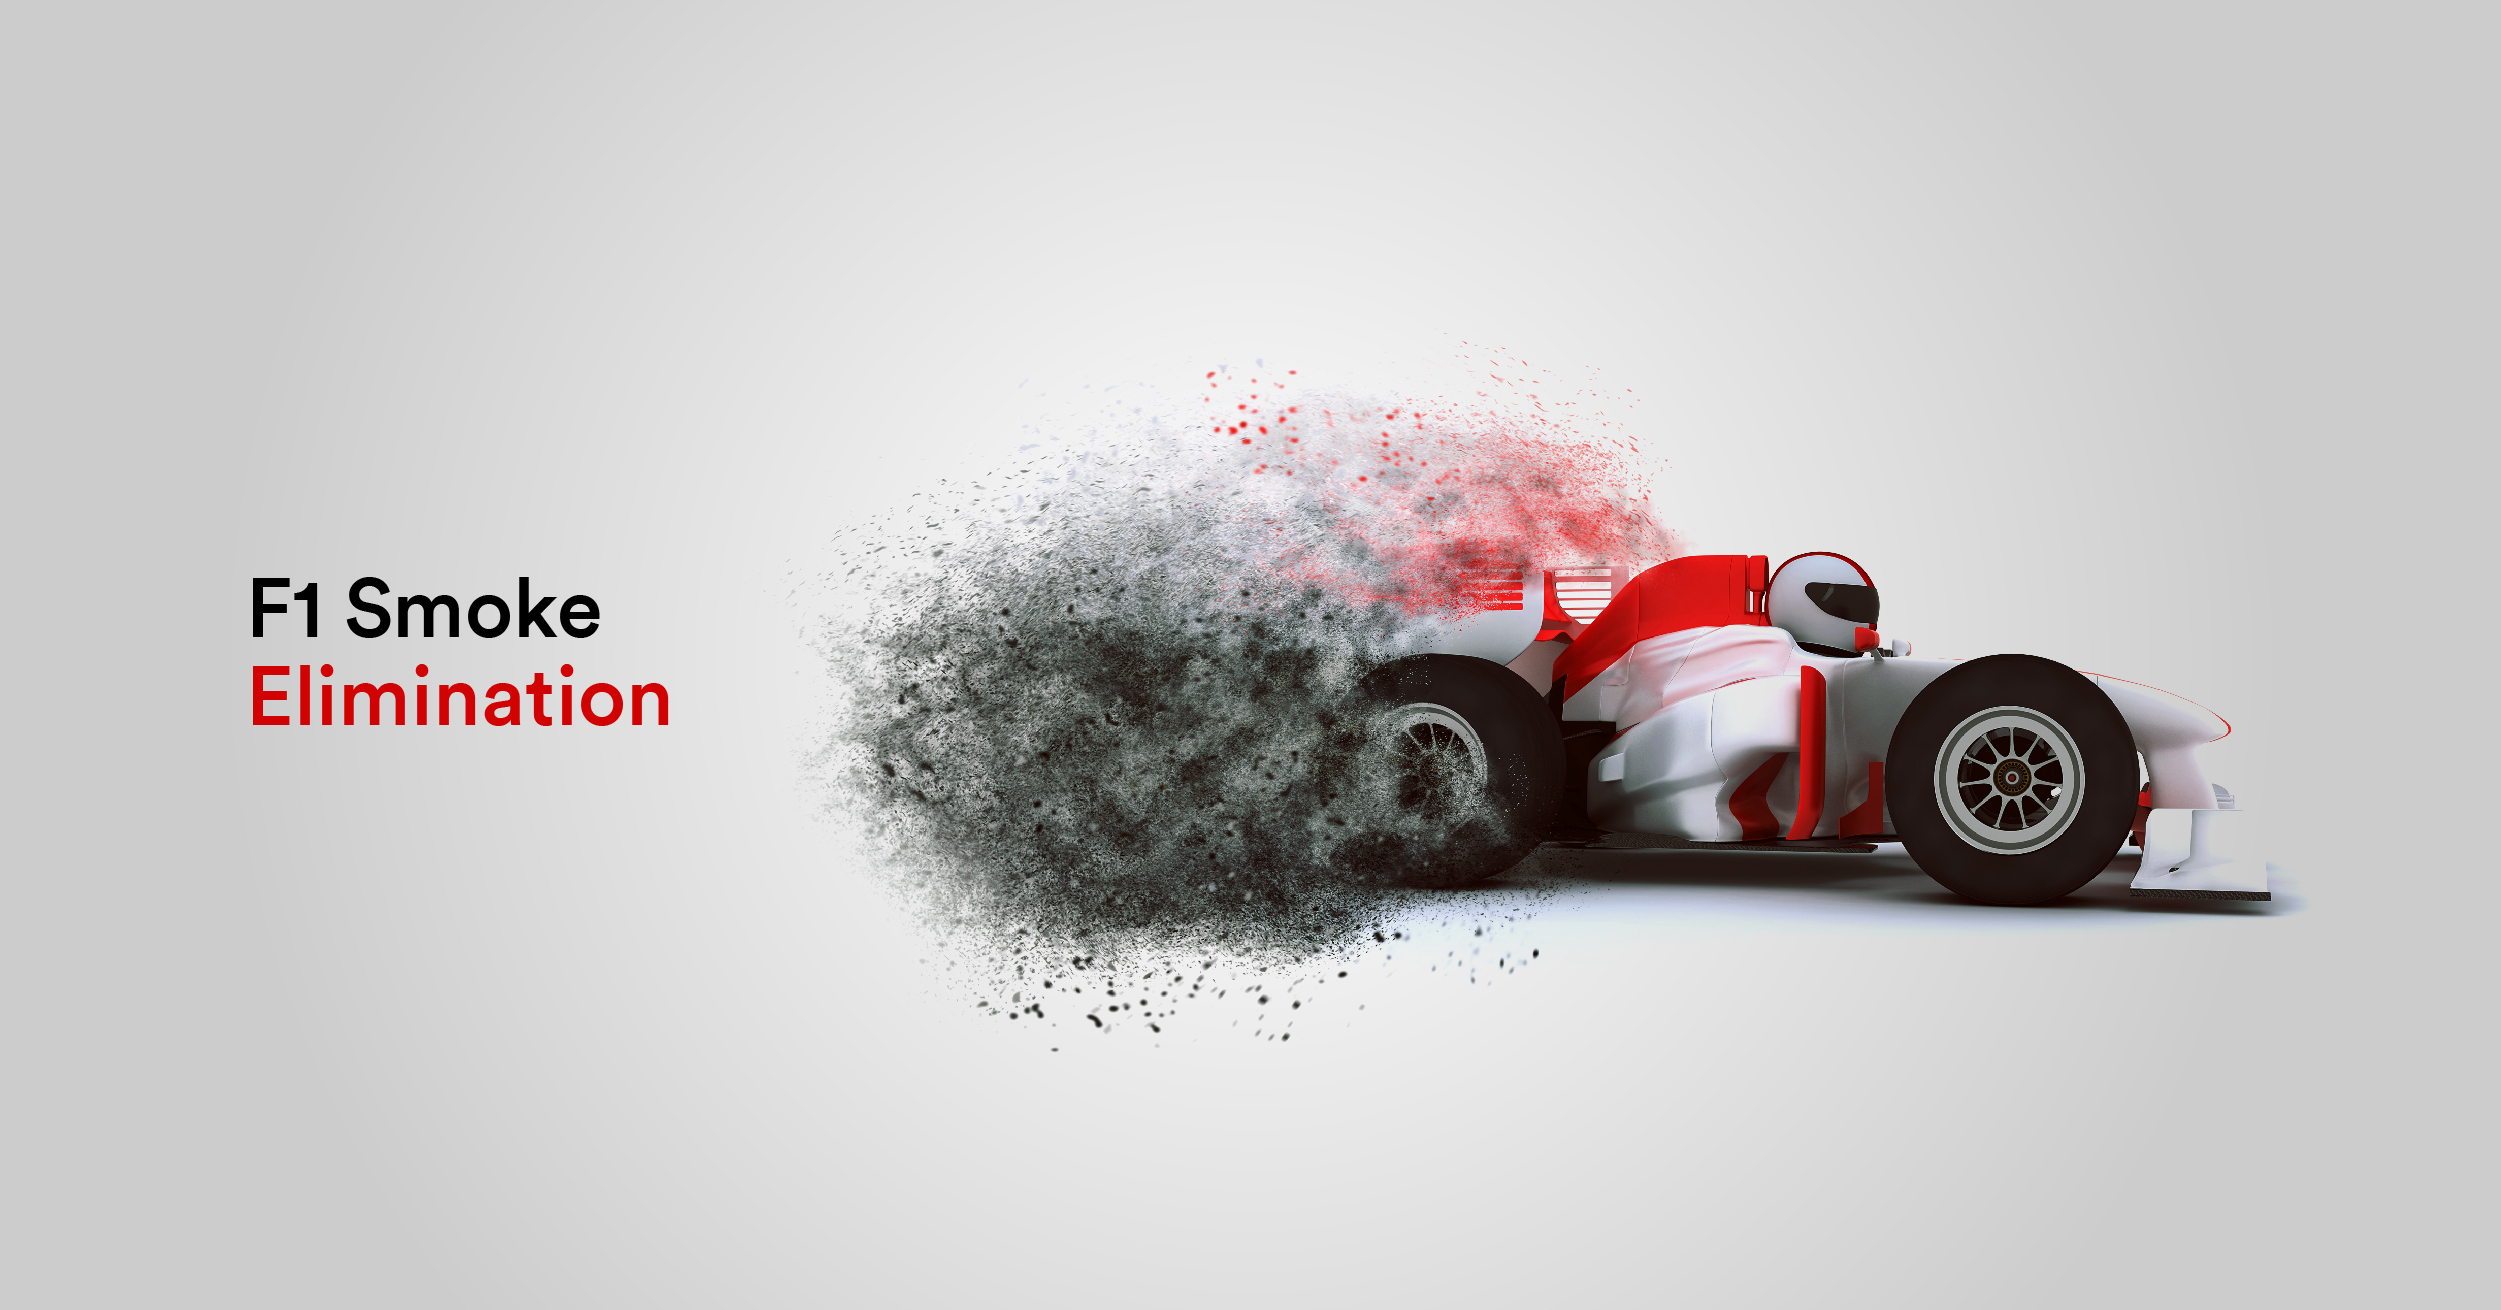

# Getting Started Code for [Smoke Elimination Challenge](https://www.aicrowd.com/challenges/smokeelimination) on AIcrowd
#### Author : Shubhamai

## Download Necessary Packages 📚

In [ ]:
!pip install --upgrade aicrowd-cli

     |████████████████████████████████| 61kB 2.7MB/s 
     |████████████████████████████████| 61kB 3.6MB/s 
     |████████████████████████████████| 204kB 4.9MB/s 
     |████████████████████████████████| 92kB 4.9MB/s 
     |████████████████████████████████| 81kB 4.3MB/s 
     |████████████████████████████████| 174kB 4.9MB/s 
     |████████████████████████████████| 61kB 5.0MB/s 
     |████████████████████████████████| 51kB 4.3MB/s 
     |████████████████████████████████| 71kB 4.8MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Found existing installation: click 8.0.0
    Uninstalling click-8.0.0:
      Successfully uninstalled click-8.0.0
  Found existing installation: tqdm 4.41.1
 

## Download Data ⏬
The first step is to download out train test data. We will be training a model on the train data and make predictions on test data. We submit our predictions.


In [ ]:
API_KEY = "12b8ecf88e45f2676140026267a60d79"
!aicrowd login --api-key $API_KEY

API Key valid
Saved API Key successfully!


In [ ]:
!aicrowd dataset download --challenge f1-smoke-elimination -j 3

test.zip:   0% 0.00/38.6M [00:00<?, ?B/s]
train.zip:   0% 0.00/328M [00:00<?, ?B/s]

test.zip: 100% 38.6M/38.6M [00:02<00:00, 16.3MB/s]

val.zip:   0% 0.00/32.8M [00:00<?, ?B/s]

sample_submission.zip:  87% 33.6M/38.8M [00:04<00:00, 7.84MB/s]
train.zip:  20% 67.1M/328M [00:05<00:22, 11.8MB/s]

sample_submission.zip: 100% 38.8M/38.8M [00:04<00:00, 8.70MB/s]

val.zip: 100% 32.8M/32.8M [00:05<00:00, 6.35MB/s]

train.zip:  41% 134M/328M [00:10<00:14, 12.9MB/s]
train.zip:  51% 168M/328M [00:13<00:12, 12.8MB/s]
train.zip:  61% 201M/328M [00:16<00:10, 12.5MB/s]
train.zip:  72% 235M/328M [00:18<00:07, 12.5MB/s]
train.zip:  82% 268M/328M [00:21<00:05, 11.8MB/s]
train.zip:  92% 302M/328M [00:25<00:02, 11.1MB/s]
train.zip: 100% 328M/328M [00:26<00:00, 12.2MB/s]


Below, we create a new directory to put our downloaded data! 🏎

We unzip the ZIP files and move the CSVs.

In [ ]:
!rm -rf data
!mkdir data


!unzip train.zip -d data/train >/dev/null
!unzip val.zip -d data/val >/dev/null 
!unzip test.zip -d data/test >/dev/null
!unzip sample_submission.zip -d data/sample_submission >/dev/null

#Test code from https://machinelearningmastery.com/how-to-develop-a-pix2pix-gan-for-image-to-image-translation/

# Load some data, not all, because it's quite huge, and takes a lot of ram memory.

In [ ]:
# load, split and scale the maps dataset ready for training
from os import listdir
from numpy import asarray
from numpy import vstack
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from numpy import savez_compressed

# load all images in a directory into memory
def load_images(path,path2, size=(256,256)):
  src_list, tar_list = list(), list()
  # enumerate filenames in directory, assume all are images
  i = 0
  for filename in listdir(path):
    if (i == 2000):
      break
    else:
      # load and resize the image
      clear_img = load_img(path + filename, target_size=size)
      # convert to numpy array
      clear_img = img_to_array(clear_img)
      tar_list.append(clear_img)
      i = i +1
      print(i)
  i = 0
  for filename in listdir(path2):
    if (i == 2000):
      break
    else:
      i = i +1
      # load and resize the image
      smoke_img = load_img(path2 + filename, target_size=size)
      # convert to numpy array
      smoke_img = img_to_array(smoke_img)
      src_list.append(smoke_img)
  return [asarray(src_list), asarray(tar_list)]

# dataset path
path = 'data/train/clear/'
path2 = 'data/train/smoke/'
# load dataset
[src_images, tar_images] = load_images(path,path2)
print('Loaded: ', src_images.shape, tar_images.shape)
# save as compressed numpy array
filename = 'cars_256.npz'
savez_compressed(filename, src_images, tar_images)
print('Saved dataset: ', filename)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


# To see if the array is correctly made.

Loaded:  (2000, 256, 256, 3) (2000, 256, 256, 3)


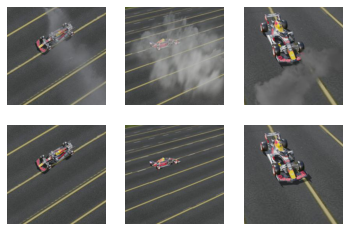

In [ ]:
# load the prepared dataset
from numpy import load
from matplotlib import pyplot
# load the dataset
data = load('cars_256.npz')
src_images, tar_images = data['arr_0'], data['arr_1']
print('Loaded: ', src_images.shape, tar_images.shape)
# plot source images
n_samples = 3
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + i)
	pyplot.axis('off')
	pyplot.imshow(src_images[i].astype('uint8'))
# plot target image
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + n_samples + i)
	pyplot.axis('off')
	pyplot.imshow(tar_images[i].astype('uint8'))
pyplot.show()

# Training the model, it takes a long time.

In [ ]:
# example of pix2pix gan for satellite to map image-to-image translation
from numpy import load
from numpy import zeros
from numpy import ones
from numpy.random import randint
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from keras.models import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from matplotlib import pyplot

# define the discriminator model
def define_discriminator(image_shape):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# source image input
	in_src_image = Input(shape=image_shape)
	# target image input
	in_target_image = Input(shape=image_shape)
	# concatenate images channel-wise
	merged = Concatenate()([in_src_image, in_target_image])
	# C64
	d = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(merged)
	d = LeakyReLU(alpha=0.2)(d)
	# C128
	d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C256
	d = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C512
	d = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# second last output layer
	d = Conv2D(512, (4,4), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# patch output
	d = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d)
	patch_out = Activation('sigmoid')(d)
	# define model
	model = Model([in_src_image, in_target_image], patch_out)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, loss_weights=[0.5])
	return model

# define an encoder block
def define_encoder_block(layer_in, n_filters, batchnorm=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add downsampling layer
	g = Conv2D(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
	# conditionally add batch normalization
	if batchnorm:
		g = BatchNormalization()(g, training=True)
	# leaky relu activation
	g = LeakyReLU(alpha=0.2)(g)
	return g

# define a decoder block
def decoder_block(layer_in, skip_in, n_filters, dropout=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add upsampling layer
	g = Conv2DTranspose(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
	# add batch normalization
	g = BatchNormalization()(g, training=True)
	# conditionally add dropout
	if dropout:
		g = Dropout(0.5)(g, training=True)
	# merge with skip connection
	g = Concatenate()([g, skip_in])
	# relu activation
	g = Activation('relu')(g)
	return g

# define the standalone generator model
def define_generator(image_shape=(256,256,3)):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# image input
	in_image = Input(shape=image_shape)
	# encoder model
	e1 = define_encoder_block(in_image, 64, batchnorm=False)
	e2 = define_encoder_block(e1, 128)
	e3 = define_encoder_block(e2, 256)
	e4 = define_encoder_block(e3, 512)
	e5 = define_encoder_block(e4, 512)
	e6 = define_encoder_block(e5, 512)
	e7 = define_encoder_block(e6, 512)
	# bottleneck, no batch norm and relu
	b = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(e7)
	b = Activation('relu')(b)
	# decoder model
	d1 = decoder_block(b, e7, 512)
	d2 = decoder_block(d1, e6, 512)
	d3 = decoder_block(d2, e5, 512)
	d4 = decoder_block(d3, e4, 512, dropout=False)
	d5 = decoder_block(d4, e3, 256, dropout=False)
	d6 = decoder_block(d5, e2, 128, dropout=False)
	d7 = decoder_block(d6, e1, 64, dropout=False)
	# output
	g = Conv2DTranspose(3, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d7)
	out_image = Activation('tanh')(g)
	# define model
	model = Model(in_image, out_image)
	return model

# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model, image_shape):
	# make weights in the discriminator not trainable
	for layer in d_model.layers:
		if not isinstance(layer, BatchNormalization):
			layer.trainable = False
	# define the source image
	in_src = Input(shape=image_shape)
	# connect the source image to the generator input
	gen_out = g_model(in_src)
	# connect the source input and generator output to the discriminator input
	dis_out = d_model([in_src, gen_out])
	# src image as input, generated image and classification output
	model = Model(in_src, [dis_out, gen_out])
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss=['binary_crossentropy', 'mae'], optimizer=opt, loss_weights=[1,100])
	return model

# load and prepare training images
def load_real_samples(filename):
	# load compressed arrays
	data = load(filename)
	# unpack arrays
	X1, X2 = data['arr_0'], data['arr_1']
	# scale from [0,255] to [-1,1]
	X1 = (X1 - 127.5) / 127.5
	X2 = (X2 - 127.5) / 127.5
	return [X1, X2]

# select a batch of random samples, returns images and target
def generate_real_samples(dataset, n_samples, patch_shape):
	# unpack dataset
	trainA, trainB = dataset
	# choose random instances
	ix = randint(0, trainA.shape[0], n_samples)
	# retrieve selected images
	X1, X2 = trainA[ix], trainB[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, patch_shape, patch_shape, 1))
	return [X1, X2], y

# generate a batch of images, returns images and targets
def generate_fake_samples(g_model, samples, patch_shape):
	# generate fake instance
	X = g_model.predict(samples)
	# create 'fake' class labels (0)
	y = zeros((len(X), patch_shape, patch_shape, 1))
	return X, y

# generate samples and save as a plot and save the model
def summarize_performance(step, g_model, dataset, n_samples=3):
	# select a sample of input images
	[X_realA, X_realB], _ = generate_real_samples(dataset, n_samples, 1)
	# generate a batch of fake samples
	X_fakeB, _ = generate_fake_samples(g_model, X_realA, 1)
	# scale all pixels from [-1,1] to [0,1]
	X_realA = (X_realA + 1) / 2.0
	X_realB = (X_realB + 1) / 2.0
	X_fakeB = (X_fakeB + 1) / 2.0
	# plot real source images
	for i in range(n_samples):
		pyplot.subplot(3, n_samples, 1 + i)
		pyplot.axis('off')
		pyplot.imshow(X_realA[i])
	# plot generated target image
	for i in range(n_samples):
		pyplot.subplot(3, n_samples, 1 + n_samples + i)
		pyplot.axis('off')
		pyplot.imshow(X_fakeB[i])
	# plot real target image
	for i in range(n_samples):
		pyplot.subplot(3, n_samples, 1 + n_samples*2 + i)
		pyplot.axis('off')
		pyplot.imshow(X_realB[i])
	# save plot to file
	filename1 = 'plot_%06d.png' % (step+1)
	pyplot.savefig(filename1)
	pyplot.close()
	# save the generator model
	filename2 = 'model_%06d.h5' % (step+1)
	g_model.save(filename2)
	print('>Saved: %s and %s' % (filename1, filename2))

# train pix2pix models
def train(d_model, g_model, gan_model, dataset, n_epochs=100, n_batch=1):
	# determine the output square shape of the discriminator
	n_patch = d_model.output_shape[1]
	# unpack dataset
	trainA, trainB = dataset
	# calculate the number of batches per training epoch
	bat_per_epo = int(len(trainA) / n_batch)
	# calculate the number of training iterations
	n_steps = bat_per_epo * n_epochs
	# manually enumerate epochs
	for i in range(n_steps):
		# select a batch of real samples
		[X_realA, X_realB], y_real = generate_real_samples(dataset, n_batch, n_patch)
		# generate a batch of fake samples
		X_fakeB, y_fake = generate_fake_samples(g_model, X_realA, n_patch)
		# update discriminator for real samples
		d_loss1 = d_model.train_on_batch([X_realA, X_realB], y_real)
		# update discriminator for generated samples
		d_loss2 = d_model.train_on_batch([X_realA, X_fakeB], y_fake)
		# update the generator
		g_loss, _, _ = gan_model.train_on_batch(X_realA, [y_real, X_realB])
		# summarize performance
		print('>%d, d1[%.3f] d2[%.3f] g[%.3f]' % (i+1, d_loss1, d_loss2, g_loss))
		# summarize model performance
		if (i+1) % (bat_per_epo * 10) == 0:
			summarize_performance(i, g_model, dataset)

# load image data
dataset = load_real_samples('cars_256.npz')
print('Loaded', dataset[0].shape, dataset[1].shape)
# define input shape based on the loaded dataset
image_shape = dataset[0].shape[1:]
# define the models
d_model = define_discriminator(image_shape)
g_model = define_generator(image_shape)
# define the composite model
gan_model = define_gan(g_model, d_model, image_shape)
# train model
train(d_model, g_model, gan_model, dataset)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
>3165, d1[0.233] d2[0.210] g[5.037]
>3166, d1[0.152] d2[0.392] g[4.771]
>3167, d1[0.108] d2[0.115] g[4.634]
>3168, d1[0.217] d2[0.238] g[5.196]
>3169, d1[0.446] d2[0.305] g[5.185]
>3170, d1[0.280] d2[0.739] g[5.052]
>3171, d1[0.574] d2[0.324] g[4.269]
>3172, d1[0.432] d2[0.341] g[4.095]
>3173, d1[0.368] d2[0.241] g[6.179]
>3174, d1[0.136] d2[0.183] g[5.128]
>3175, d1[0.424] d2[0.591] g[4.233]
>3176, d1[0.047] d2[0.180] g[10.466]
>3177, d1[0.518] d2[0.226] g[4.582]
>3178, d1[0.091] d2[0.175] g[6.990]
>3179, d1[0.429] d2[0.241] g[4.868]
>3180, d1[0.459] d2[0.412] g[4.268]
>3181, d1[0.366] d2[0.355] g[3.867]
>3182, d1[0.198] d2[0.320] g[5.351]
>3183, d1[0.207] d2[0.254] g[5.060]
>3184, d1[0.382] d2[0.347] g[4.707]
>3185, d1[0.158] d2[0.272] g[7.880]
>3186, d1[0.457] d2[0.507] g[7.231]
>3187, d1[0.245] d2[0.243] g[4.694]
>3188, d1[0.580] d2[0.247] g[4.278]
>3189, d1[0.322] d2[0.262] g[4.972]
>3190, d1[0.142] d2[0

In [ ]:
# example of loading a pix2pix model and using it for image to image translation
from keras.models import load_model
from numpy import load
from numpy import vstack
from matplotlib import pyplot
from numpy.random import randint

# load and prepare training images
def load_real_samples(filename):
	# load compressed arrays
	data = load(filename)
	# unpack arrays
	X1, X2 = data['arr_0'], data['arr_1']
	# scale from [0,255] to [-1,1]
	X1 = (X1 - 127.5) / 127.5
	X2 = (X2 - 127.5) / 127.5
	return [X1, X2]

# plot source, generated and target images
def plot_images(src_img, gen_img, tar_img):
	images = vstack((src_img, gen_img, tar_img))
	# scale from [-1,1] to [0,1]
	images = (images + 1) / 2.0
	titles = ['Source', 'Generated', 'Expected']
	# plot images row by row
	for i in range(len(images)):
		# define subplot
		pyplot.subplot(1, 3, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(images[i])
		# show title
		pyplot.title(titles[i])
	pyplot.show()

# load dataset
[X1, X2] = load_real_samples('carss_256.npz')
print('Loaded', X1.shape, X2.shape)
# load model
model = load_model('model_040000.h5')#model_040000.h5 , model_060000.h5, model_080000.h5 , model_120000.h5
# select random example
ix = randint(0, len(X1), 1)
src_image, tar_image = X1[ix], X2[ix]
# generate image from source
gen_image = model.predict(src_image)
# plot all three images
plot_images(src_image, gen_image, tar_image)

# Testing the model on an image

Loaded (1, 256, 256, 3)


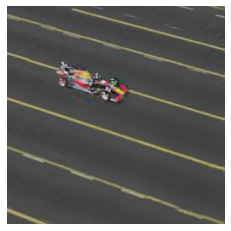

In [ ]:
# example of loading a pix2pix model and using it for one-off image translation
from keras.models import load_model
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from numpy import load
from numpy import expand_dims
from matplotlib import pyplot
 
# load an image
def load_image(filename, size=(256,256)):
	# load image with the preferred size
	pixels = load_img(filename, target_size=size)
	# convert to numpy array
	pixels = img_to_array(pixels)
	# scale from [0,255] to [-1,1]
	pixels = (pixels - 127.5) / 127.5
	# reshape to 1 sample
	pixels = expand_dims(pixels, 0)
	return pixels
 
# load source image
src_image = load_image('data/test/smoke/0.jpg')
print('Loaded', src_image.shape)
# load model
model = load_model('model_080000.h5')#model_040000.h5 , model_060000.h5, model_080000.h5 , model_120000.h5, model_140000.h5
# generate image from source
gen_image = model.predict(src_image)
# scale from [-1,1] to [0,1]
gen_image = (gen_image + 1) / 2.0
# plot the image
pyplot.imshow(gen_image[0])
pyplot.axis('off')
pyplot.show()

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image
from glob import glob
import random
from tqdm.notebook import tqdm 
import pandas as pd
from torchvision.datasets import ImageFolder
import torchvision.transforms as T

In [ ]:
data_directiory = "data"
train_path = os.path.join(data_directiory, "train")
train_smoke_path = os.path.join(data_directiory, "train/smoke")
train_clear_path = os.path.join(data_directiory, "train/clear")
val_path = os.path.join(data_directiory, "val")
val_smoke_path = os.path.join(data_directiory, "val/smoke")
val_clear_path = os.path.join(data_directiory, "val/clear")
test_data_path = os.path.join(data_directiory, "test/smoke")
test_submission_path = "clear"

In [ ]:
!rm -rf clear
!mkdir clear

# Predict the test set, and then save it. 

In [ ]:
# example of loading a pix2pix model and using it for one-off image translation
from keras.models import load_model
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
from numpy import load
from numpy import expand_dims
from matplotlib import pyplot
 
# load an image
def load_image(filename, size=(256,256)):
	# load image with the preferred size
	pixels = load_img(filename, target_size=size)
	# convert to numpy array
	pixels = img_to_array(pixels)
	# scale from [0,255] to [-1,1]
	pixels = (pixels - 127.5) / 127.5 # restore [0,255] -?> pixels*127.5 + 127.5
	# reshape to 1 sample
	pixels = expand_dims(pixels, 0)
	return pixels

# load model
model = load_model("model_140000.h5")#model_040000.h5 , model_060000.h5, model_080000.h5, model_120000.h5, model_140000.h5
# load source image
for img_name in tqdm(os.listdir(test_data_path)):
  src_image = load_image(os.path.join(test_data_path, f"{img_name}"))
  #print('Loaded', src_image.shape)
  # generate image from source
  gen_image = model.predict(src_image)
  save_img(os.path.join(test_submission_path, f"{img_name}"),gen_image[0])


  0%|          | 0/5000 [00:00<?, ?it/s]

## Save the prediction to zip

In [ ]:
!zip submission.zip -r clear/ > /dev/null

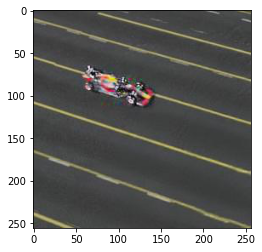

In [ ]:
sample_output_img = plt.imread(os.path.join(test_submission_path, f"0.jpg"))
plt.imshow(sample_output_img)

### 🚧 Note :    
- Do take a look at the submission format.   
- Follow all submission guidelines strictly to avoid inconvenience.

## Making direct submission thought aicrowd-cli

In [ ]:
!aicrowd submission create -c f1-smoke-elimination -f submission.zip

submission.zip ━━━━━━━━━━━━━━━━━━━━━━ 100.0% • 41.2/41.2 MB • 2.5 MB/s • 0:00:00
                                                   ╭─────────────────────────╮                                                    
                                                   │ Successfully submitted! │                                                    
                                                   ╰─────────────────────────╯                                                    
                                                         Important links                                                          
┌──────────────────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│  This submission │ https://www.aicrowd.com/challenges/ai-blitz-8/problems/f1-smoke-elimination/submissions/139940              │
│                  │                                                                                                             │
│ 